# Write a code from scratch for classificaiton of numbers 

ML101: this code is like "Hello World" for machine learning. The code already exists in [MNIST_upload.ipynb](/MNIST_upload.ipynb) 

* Read the code
* Understand each line
* write your own

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

%matplotlib inline

from sklearn.model_selection import train_test_split

# limit gpu memory usage 
# torch.cuda.set_per_process_memory_fraction(0.23, device=0)

#change to "cuda" to use GPU
device = 'cpu'



In [4]:
#read the data
with open("mnist.pkl", 'rb') as f:
    dset = pickle.load(f)

#x->input
#y->output (ground truth)
x,y = dset["x"],dset["y"]


In [7]:
N=x.shape[0]
sz=int(np.sqrt(x.shape[1]))

print(f"total samples: \t\t{N}")

total samples: 		70000


5


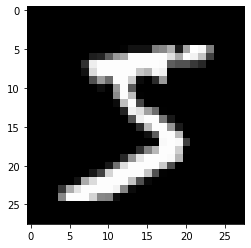

0


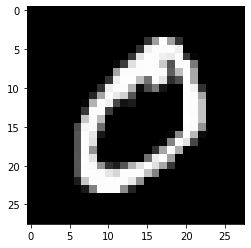

4


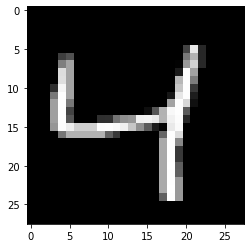

1


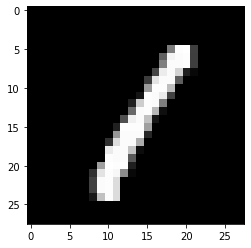

9


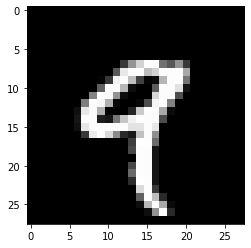

2


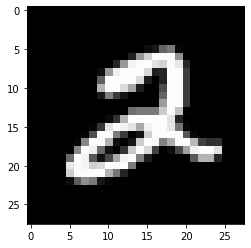

1


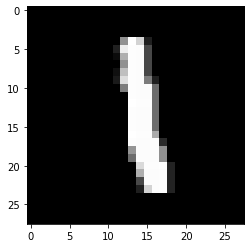

3


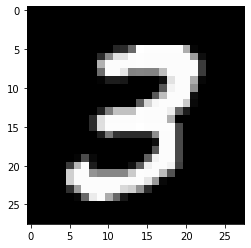

1


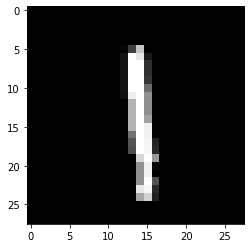

4


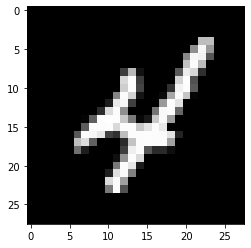

In [8]:
for img in range(10):
    print(y[img])
    img = x[img,:].reshape(sz,sz)
    plt.imshow(img,cmap='gray')
    plt.show()


In [9]:
#split the data in train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

N_train = x_train.shape[0]
print(N_train)

63000


In [10]:
#split the data in train and test
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)

#N_train = x_train.shape[0]
#print(N_train)

35000


In [19]:
class MLP(nn.Module):
    def __init__(self,input_dim, output_dim):
        super().__init__()

        self.layer1 = nn.Linear(input_dim, 20)
        self.layer2 = nn.Linear(20,50)
        self.layer3 = nn.Linear(50, output_dim)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)


    

       

In [20]:
model = MLP(sz*sz,10).to(device)
print(model)


MLP(
  (layer1): Linear(in_features=784, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=10, bias=True)
)


In [21]:
#instantiate the optimizer
optimizer = optim.Adam(model.parameters())
print(optimizer) 

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [22]:
criterion = nn.CrossEntropyLoss()
batch_size = 500


In [23]:
epochs = 100
loss_list = []

for epoch in range(epochs):
    sel = np.random.choice(range(N_train),batch_size,replace=False)
    #read data from dataset
    x = torch.tensor(x_train[sel],dtype=torch.float32,device=device)
    y = torch.tensor(y_train[sel],dtype=torch.long,device=device)

    #evaluate the NN
    pred = model(x)

    #compute the loss, backward and gradient descent
    loss = criterion(pred,y)
    loss.backward()
    optimizer.step()

    #zero the gradients
    optimizer.zero_grad()

    #append loss to list
    loss_list.append(loss.detach().to('cpu'))

    #print current statistucs
    print(f"epoch={epoch}/{epochs}; loss={loss}")


epoch=0/100; loss=14.736495018005371
epoch=1/100; loss=9.347752571105957
epoch=2/100; loss=8.465645790100098
epoch=3/100; loss=7.254217147827148
epoch=4/100; loss=6.29219388961792
epoch=5/100; loss=5.424056529998779
epoch=6/100; loss=4.255781173706055
epoch=7/100; loss=3.9309706687927246
epoch=8/100; loss=2.962510347366333
epoch=9/100; loss=2.972076654434204
epoch=10/100; loss=2.6418867111206055
epoch=11/100; loss=2.6647346019744873
epoch=12/100; loss=2.4066128730773926
epoch=13/100; loss=2.239396810531616
epoch=14/100; loss=2.109811305999756
epoch=15/100; loss=2.027073860168457
epoch=16/100; loss=1.7828402519226074
epoch=17/100; loss=1.7948768138885498
epoch=18/100; loss=1.8662950992584229
epoch=19/100; loss=1.7395375967025757
epoch=20/100; loss=1.706434965133667
epoch=21/100; loss=1.8038843870162964
epoch=22/100; loss=1.699521780014038
epoch=23/100; loss=1.655738353729248
epoch=24/100; loss=1.71501624584198
epoch=25/100; loss=1.6715244054794312
epoch=26/100; loss=1.4643810987472534
e

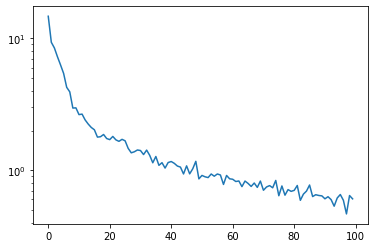

In [24]:
plt.plot(loss_list)
plt.yscale('log')
plt.show()

In [26]:
def compute_accuracy(pred, y):
    #selct the top probability
    top_pred = pred.argmax(1, keepdim = True)[:,0]
    #compute number of correct predictions
    correct = (top_pred==y).sum()
    #compute accuracy
    acc = correct.float()/y.shape[0]
    return acc

2


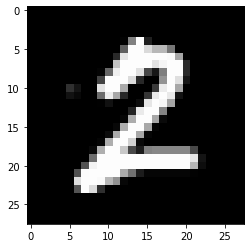

1


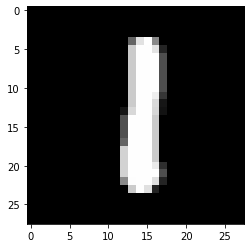

8


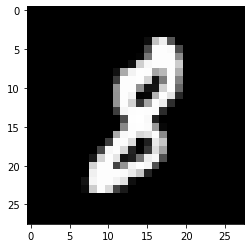

2


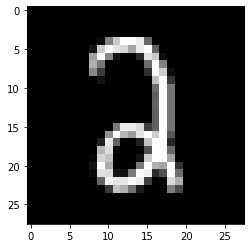

7


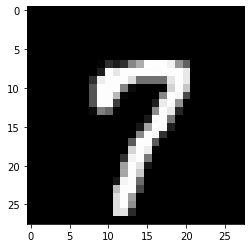

In [27]:
#let's plot some images
for img in range(5):
    print(y_test[img])
    img = x_test[img,:].reshape(sz,sz)
    plt.imshow(img,cmap='gray')
    plt.show()

In [29]:
with torch.no_grad():
    x = torch.tensor(x_test,dtype=torch.float32,device=device)
    y = torch.tensor(y_test,dtype=torch.long,device=device)

    pred = model(x)

    acc = compute_accuracy(pred,y)

    print(f"test accuracy: {acc}")

test accuracy: 0.7953428626060486


In [30]:
top_pred = pred.argmax(1, keepdim = True)[:,0]
print(top_pred)
print(y_test)
for j in range(len(y_test)):
    print("number is %g and prediction is %g" % (y_test[j], top_pred[j].float()))
    

tensor([2, 1, 8,  ..., 4, 8, 7])
[2 1 8 ... 4 3 7]
number is 2 and prediction is 2
number is 1 and prediction is 1
number is 8 and prediction is 8
number is 2 and prediction is 2
number is 7 and prediction is 7
number is 9 and prediction is 9
number is 7 and prediction is 7
number is 8 and prediction is 3
number is 1 and prediction is 1
number is 0 and prediction is 5
number is 1 and prediction is 1
number is 2 and prediction is 2
number is 3 and prediction is 8
number is 1 and prediction is 1
number is 1 and prediction is 1
number is 0 and prediction is 0
number is 3 and prediction is 5
number is 8 and prediction is 1
number is 0 and prediction is 2
number is 3 and prediction is 3
number is 5 and prediction is 7
number is 1 and prediction is 1
number is 1 and prediction is 1
number is 0 and prediction is 0
number is 9 and prediction is 9
number is 0 and prediction is 8
number is 7 and prediction is 9
number is 4 and prediction is 4
number is 3 and prediction is 3
number is 4 and predi